# Tutorial for quantum circuit generation and compilation process

First, you need to install packages in requirements.txt.

In [ ]:
!pip install -r requirements.txt

## 1. Generate a polycube job request from a `QuantumCircuit` in Qiskit

/Users/parton/KEIO-UCL研究/2025_04_25_QMP_for_publish_arXiv/FTQMP-Scheduler/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


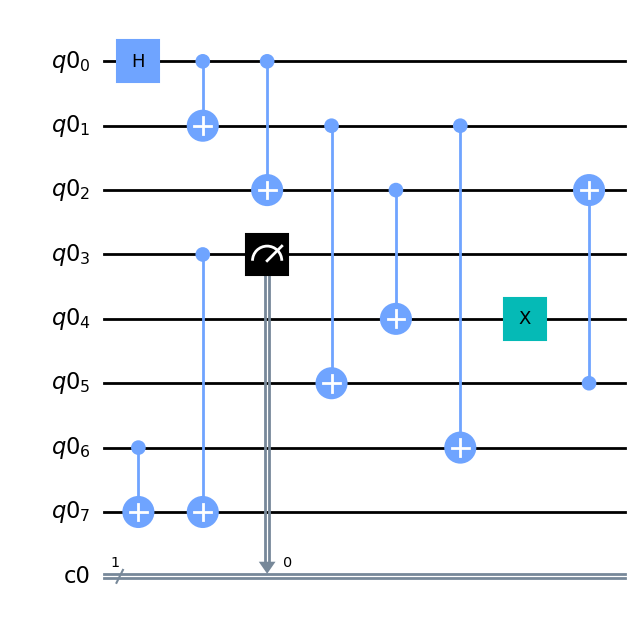

In [1]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(8)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
# A quantum circuit
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[2])
qc.cx(qr[2], qr[4])
qc.cx(qr[1], qr[5])
qc.x(qr[4])
qc.cx(qr[5], qr[2])
qc.cx(qr[6], qr[7])
qc.cx(qr[3], qr[7])
qc.cx(qr[1], qr[6])
qc.measure(qr[3],cr[0])
qc.draw(output='mpl')

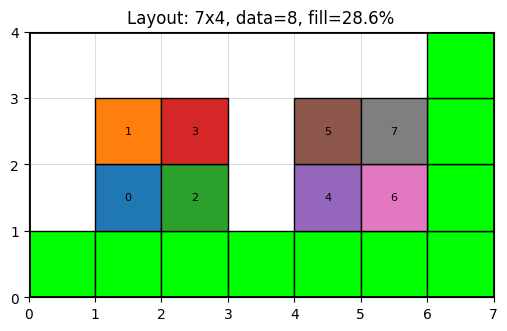

In [2]:
from floorplan import *
from compile_qc_to_ls import *
# you can make a floorplan for a quantum circuit
floorplan =  place_surface_code_qubits_without_size_const(num_data_qubits = qc.num_qubits,  frame = ["bottom","right"], pattern = "block44")
visualize_qubit_layout(floorplan, show_data_indices=True) # a visualizer

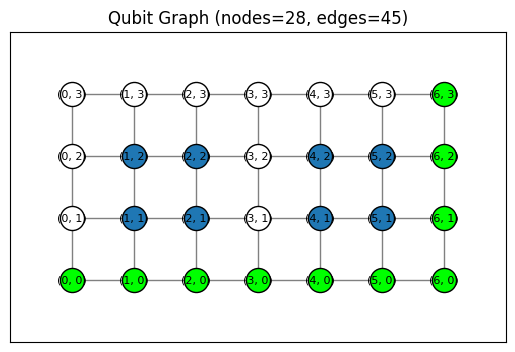

In [3]:
# Theere is another visualizer of floorplans as a graph
G = build_graph_from_qubit_floorplan(floorplan)
visualize_qubit_graph(G, show_labels=True)

In [4]:
# Convert the quantum circuit to a lattice surgery polycube
LS =  qc_to_LS(qc, floorplan)
LS
# note that cx gate is here regarded as a single code clock gate, and any single qubit gate is regarded as a single patch gate for simplicity.

[['1Q', [(1, 1)], [0]],
 ['2Q', [(1, 1), (1, 2)], [0, 1]],
 ['2Q', [(1, 1), (2, 1)], [0, 2]],
 ['2Q', [(2, 1), (3, 1), (4, 1)], [2, 4]],
 ['2Q', [(1, 2), (2, 2), (3, 2), (4, 2)], [1, 5]],
 ['1Q', [(4, 1)], [4]],
 ['2Q', [(4, 2), (3, 2), (3, 1), (2, 1)], [5, 2]],
 ['2Q', [(5, 1), (5, 2)], [6, 7]],
 ['2Q', [(2, 2), (3, 2), (4, 2), (5, 2)], [3, 7]],
 ['2Q', [(1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (5, 1)], [1, 6]],
 ['M', [(2, 2)], [3]]]

In [5]:
# Then the polycube is generated from the lattice surgery
# The polycube is a list of 3D coordinates.
polycube = LS_to_polycube(LS, floorplan)
polycube

[[1, 1, 0],
 [1, 2, 0],
 [2, 1, 0],
 [2, 2, 0],
 [4, 1, 0],
 [4, 2, 0],
 [5, 1, 0],
 [5, 2, 0],
 [1, 1, 1],
 [1, 2, 1],
 [2, 1, 1],
 [2, 2, 1],
 [4, 1, 1],
 [4, 2, 1],
 [5, 1, 1],
 [5, 2, 1],
 [1, 1, 2],
 [2, 1, 2],
 [1, 2, 2],
 [2, 2, 2],
 [4, 1, 2],
 [4, 2, 2],
 [5, 1, 2],
 [5, 2, 2],
 [2, 1, 3],
 [3, 1, 3],
 [4, 1, 3],
 [1, 2, 3],
 [2, 2, 3],
 [3, 2, 3],
 [4, 2, 3],
 [1, 1, 3],
 [5, 1, 3],
 [5, 2, 3],
 [4, 1, 4],
 [4, 2, 4],
 [3, 2, 4],
 [3, 1, 4],
 [2, 1, 4],
 [5, 1, 4],
 [5, 2, 4],
 [1, 1, 4],
 [1, 2, 4],
 [2, 2, 4],
 [2, 2, 5],
 [3, 2, 5],
 [4, 2, 5],
 [5, 2, 5],
 [1, 1, 5],
 [1, 2, 5],
 [2, 1, 5],
 [4, 1, 5],
 [5, 1, 5],
 [1, 2, 6],
 [2, 2, 6],
 [2, 1, 6],
 [3, 1, 6],
 [4, 1, 6],
 [5, 1, 6],
 [2, 2, 6]]

In [6]:
import viewscad
from solid import scad_render
from solidpolycube import *
polycube_model = create_polycube(polycube)

cubes [<solid.objects.translate object at 0x156af57e0>, <solid.objects.translate object at 0x156dda7a0>, <solid.objects.translate object at 0x156dda920>, <solid.objects.translate object at 0x156dda980>, <solid.objects.translate object at 0x156dda9e0>, <solid.objects.translate object at 0x156ddaa40>, <solid.objects.translate object at 0x156ddaaa0>, <solid.objects.translate object at 0x156ddab00>, <solid.objects.translate object at 0x156ddab60>, <solid.objects.translate object at 0x156ddabc0>, <solid.objects.translate object at 0x156ddac20>, <solid.objects.translate object at 0x156ddac80>, <solid.objects.translate object at 0x156ddace0>, <solid.objects.translate object at 0x156ddad40>, <solid.objects.translate object at 0x156ddada0>, <solid.objects.translate object at 0x156ddae00>, <solid.objects.translate object at 0x156ddae60>, <solid.objects.translate object at 0x156ddaec0>, <solid.objects.translate object at 0x156ddaf20>, <solid.objects.translate object at 0x156ddaf80>, <solid.object

In [7]:
# you can now visualize the model using viewscad.
# note that since this rendering is using STL file, it does not support the color.
r = viewscad.Renderer()
r.render(polycube_model)

EXPORT-WARNING: Exported object may not be a valid 2-manifold and may need repair
Geometries in cache: 60
Geometry cache size in bytes: 53760
CGAL Polyhedrons in cache: 1
CGAL cache size in bytes: 60048
Total rendering time: 0:00:01.486
Top level object is a 3D object (Nef polyhedron):
   Simple:     no
   Vertices:       35
   Halfedges:     108
   Edges:          54
   Halffacets:     42
   Facets:         21
   Volumes:         2


In [8]:
# You can also save the model as openscad file. You need OpenSCAD(free software). It supports color.
with open("polycube.scad", "w") as f:
    f.write(scad_render(polycube_model))

In [9]:
# If you have multiple quantum circuit, you can run create_polycubes function.
qc2 = QuantumCircuit(10)
qc2.h(0)
qc2.cx(0, 1)
qc2.cx(3, 2)
qc2.cx(0, 9)
qc2.cx(3, 1)

floorplan =  place_surface_code_qubits_without_size_const(num_data_qubits = qc2.num_qubits,  frame = ["bottom","right"], pattern = "block44")
LS2 =  qc_to_LS(qc, floorplan)
polycube2 = LS_to_polycube(LS2, floorplan)

coords_list = [polycube, polycube2]
colors = ["red", "blue"]

polycubes = create_polycubes(coords_list, colors, unit_size=1)

In [10]:
r = viewscad.Renderer()
r.render(polycubes)

EXPORT-WARNING: Exported object may not be a valid 2-manifold and may need repair
Geometries in cache: 203
Geometry cache size in bytes: 181888
CGAL Polyhedrons in cache: 3
CGAL cache size in bytes: 205136
Total rendering time: 0:00:03.430
Top level object is a 3D object (Nef polyhedron):
   Simple:     no
   Vertices:       43
   Halfedges:     132
   Edges:          66
   Halffacets:     54
   Facets:         27
   Volumes:         3


In [11]:
with open("polycubes.scad", "w") as f:
    f.write(scad_render(polycubes))

## 2. Create job requests from random quantum circuits

In [13]:
from random_qc import *
# Create job requests from random quantum circuits
# it will create a json file

width = 11 # width of the quantum processor
unit_time = 50 # unit time for interval between jobs. It is randomly sampled from 1-4 * Unit_time
num_qc = 500 # number of quantum circuits
num_qubits = [5,100] # num_qubits are randomly sampled from this range
layers = [1,10] # number of layers are randomly sampled from this range
json_file_name = "programs_from_random_qc.json" # json file name 
random_circuit_to_json_with_fixed_width(width, unit_time = unit_time, num_qc = num_qc,num_qubits=num_qubits, layers=layers, json_file_name = json_file_name)

saved as: programs_from_random_qc.json


True

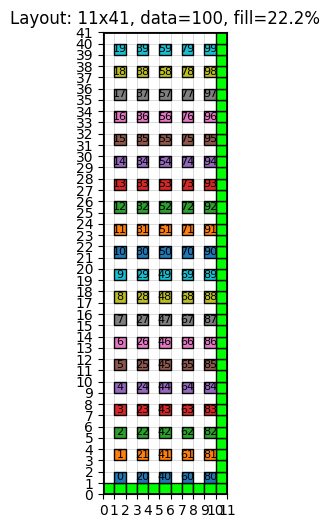

In [14]:
# if you want to check the max height you need for a fixed width and number of qubits
# you can use the following function
# it will return autofloorplan
auto_floorplan(num_qubits[1], width, pattern = "block25")